In [1]:
from pathlib import Path
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm
import PIL.Image as Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from glob import glob
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [3]:
data = []
labels = []

classes = 43
import os
current_path = os.getcwd()

In [4]:
for i in range(classes):
    path = os.path.join(current_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path+'\\'+a)
            image = image.resize((64,64))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [7]:
data.shape,labels.shape

((39209, 64, 64, 3), (39209,))

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=35,shuffle=True,stratify=labels)

In [9]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((31367, 64, 64, 3), (7842, 64, 64, 3), (31367,), (7842,))

In [10]:
Y_test = to_categorical(Y_test,43)
Y_train = to_categorical(Y_train,43)

With the use of categorical we can now define our classes in the following way - 

Cats, Dog, Monkey - [0,1,2]


Cats, Dog, Monkey - [1,0,0],[0,1,0],[0,0,1]

In [11]:
Y_test[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
vggnet_model = Sequential()

pretrained_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(64,64,3),
    pooling='max',
    classes=43)

for layer in pretrained_model.layers:
    layer.trainable = False

vggnet_model.add(pretrained_model)
vggnet_model.add(Flatten())
vggnet_model.add(Dense(256,activation='relu'))
vggnet_model.add(Dense(512,activation='relu'))
vggnet_model.add(Dense(43,activation='softmax'))


In [13]:
vggnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 43)                22059     
                                                                 
Total params: 14,999,659
Trainable params: 284,971
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
from tensorflow.keras.optimizers import Adam

In [15]:
vggnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
X_train_std = X_train/255
X_test_std = X_test/255

In [17]:
epochs = 20
history = vggnet_model.fit(X_train_std,Y_train,validation_split=0.25,epochs=epochs)

Epoch 1/20
736/736 [==============================] - 43s 45ms/step - loss: 1.5460 - accuracy: 0.5148 - val_loss: 1.0735 - val_accuracy: 0.6389
Epoch 2/20
736/736 [==============================] - 28s 38ms/step - loss: 0.8631 - accuracy: 0.7143 - val_loss: 0.7603 - val_accuracy: 0.7488
Epoch 3/20
736/736 [==============================] - 29s 39ms/step - loss: 0.6176 - accuracy: 0.7964 - val_loss: 0.6209 - val_accuracy: 0.7898
Epoch 4/20
736/736 [==============================] - 29s 39ms/step - loss: 0.4787 - accuracy: 0.8368 - val_loss: 0.5932 - val_accuracy: 0.7953
Epoch 5/20
736/736 [==============================] - 29s 39ms/step - loss: 0.3687 - accuracy: 0.8755 - val_loss: 0.4921 - val_accuracy: 0.8369
Epoch 6/20
736/736 [==============================] - 29s 39ms/step - loss: 0.3099 - accuracy: 0.8958 - val_loss: 0.4709 - val_accuracy: 0.8520
Epoch 7/20
736/736 [==============================] - 29s 39ms/step - loss: 0.2635 - accuracy: 0.9107 - val_loss: 0.3940 - val_accuracy:

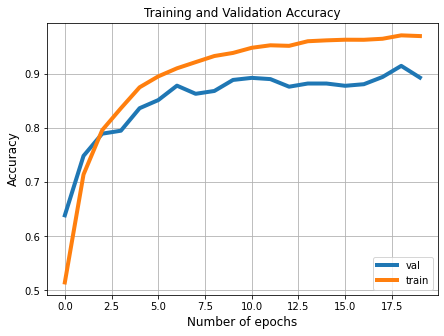

In [18]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

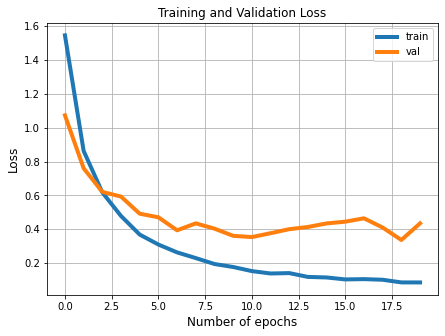

In [19]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [20]:
score,acc = vggnet_model.evaluate(X_test_std,Y_test)
print(score,acc)

246/246 [==============================] - 8s 30ms/step - loss: 0.4229 - accuracy: 0.8922
0.42285826802253723 0.8922469019889832


In [21]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

In [22]:
label_map = ['20_speed','30_speed','50_speed','60_speed','70_speed','80_speed','80_lifted','100_speed','120_speed','no_overtaking_general',
'no_overtaking_trucks','right_of_way_crossing','right_of_way_general','give_way','stop','no_way_general','no_way_trucks',
'no_way_one_way','attention_general','attention_left_turn','attention_right_turn','attention_curvy','attention_bumpers','attention_slippery',
'attention_bottleneck','attention_construction','attention_traffic_light','attention_pedestrian','attention_children',
'attention_bikes','attention_snowflake','attention_deer','lifted_general','turn_right','turn_left','turn_straight','turn_straight_right','turn_straight_left',
'turn_right_down','turn_left_down','turn_circle','lifted_no_overtaking_general','lifted_no_overtaking_trucks']

In [23]:
len(label_map)

43

1
30_speed


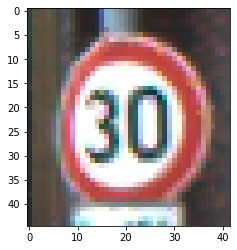

In [27]:
img_test = cv2.imread(r'Test\00001.png')
img_resize = cv2.resize(img_test,(64,64))
plt.imshow(mpimg.imread(r'Test\00001.png'))
# img_scaled = img_resize/255
img_reshaped = np.reshape(img_resize,[1,64,64,3])
input_pred = vggnet_model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)
print(label_map[input_label])